In [23]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_usa_c.h5

In [ ]:
data  = pd.read_csv(r"C:\Users\trinkesh\Downloads\owid-covid-data.csv")
data.head()

In [4]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989
263,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
264,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060
265,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15659,15659,15789,15853,15897,15982,16000,16035,16095,16117


In [6]:
covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

C:\Users\trinkesh\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-10-25 07:24:32,33.93911,67.709953,40768.0,1511.0,34023.0,5234.0,104.725758,NaN,NaN,3.706338,4,AFG
1,Albania,2020-10-25 07:24:32,41.15330,20.168300,18858.0,473.0,10548.0,7837.0,655.292237,NaN,NaN,2.508219,8,ALB
2,Algeria,2020-10-25 07:24:32,28.03390,1.659600,55880.0,1907.0,38932.0,15041.0,127.431405,NaN,NaN,3.412670,12,DZA
3,Andorra,2020-10-25 07:24:32,42.50630,1.521800,4038.0,69.0,2729.0,1240.0,5226.169676,NaN,NaN,1.708767,20,AND
4,Angola,2020-10-25 07:24:32,-11.20270,17.873900,9026.0,267.0,3461.0,5298.0,27.462808,NaN,NaN,2.958121,24,AGO


In [8]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026


In [9]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1481,1485,1488,1492,1497,1499,1501,1505,1507,1511
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,439,443,448,451,454,458,462,465,469,473
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1827,1841,1846,1856,1865,1873,1880,1888,1897,1907
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,59,59,59,59,62,62,63,63,69,69
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,228,234,241,247,248,251,255,260,265,267


In [10]:
confirmed = confirmed.rename(columns= {"Province/State":"state","Country/Region":"country"})

deaths = deaths.rename(columns= {"Province/State":"state","Country/Region":"country"})

covid19  = covid19.rename(columns= {"Country_Region":"country"})

covid19["Active"] = covid19["Confirmed"]- covid19["Recovered"]- covid19["Deaths"]

covid19["Active"] = covid19["Confirmed"] - covid19["Recovered"] - covid19["Deaths"]

confirmed.loc[confirmed["country"]=="US","country"] = "USA"
covid19.loc[covid19["country"]=="US","country"] = "USA"
deaths.loc[deaths["country"]=="US","country"] = "USA"
table.loc[table["Country_Region"]=="US","country"] = "USA"



confirmed.loc[confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
deaths.loc[deaths['country'] == 'Korea, South', "country"] = 'South Korea'
covid19.loc[covid19['country'] == "Korea, South", "country"] = "South Korea"
table.loc[table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"

confirmed.loc[confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
deaths.loc[deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
covid19.loc[covid19['country'] == "Taiwan*", "country"] = "Taiwan"
table.loc[table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"


confirmed.loc[confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
deaths.loc[deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
covid19.loc[covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
table.loc[table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"


confirmed.loc[confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
deaths.loc[deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
covid19.loc[covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
table.loc[table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"


confirmed.loc[confirmed['country'] == "Reunion", "country"] = "Réunion"
deaths.loc[deaths['country'] == "Reunion", "country"] = "Réunion"
covid19.loc[covid19['country'] == "Reunion", "country"] = "Réunion"
table.loc[table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"


confirmed.loc[confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
deaths.loc[deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
covid19.loc[covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
table.loc[table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"



confirmed.loc[confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
deaths.loc[deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
covid19.loc[covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
table.loc[table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"



confirmed.loc[confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
deaths.loc[deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
covid19.loc[covid19['country'] == "Gambia, The", "country"] = "Gambia"
table.loc[table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"

countries = np.asarray(confirmed["country"])
countries1 = np.asarray(covid19["country"])
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in table["Country_Region"].values])



In [11]:
table = table[table["continent"] != "Others"]

deaths = deaths[deaths["continent" ] == "Others"]

In [12]:
confirmed = confirmed.replace(np.nan, '', regex=True)
deaths = deaths.replace(np.nan, '', regex=True)
# df_recovered = df_recovered.replace(np.nan, '', regex=True)
# df_active = df_active.replace(np.nan, '', regex=True)

plot_params()

visualize_covid_cases()

get_mortality_rate()

In [14]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""+"output/"

In [15]:
df_countries_cases = covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

In [18]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='Wistia',axis=1)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
0,42624910.000000,1149928.000000,28768667.000000,12563564.000000,134501.071027,0.000000,0.000000,451.868852,97619.000000


In [19]:
df_continents_cases.style.background_gradient(cmap='Wistia')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
continent,,,,,,,,,
Others,42624910.000000,1149928.000000,28768667.000000,12563564.000000,134501.071027,0.000000,0.000000,451.868852,97619


In [20]:
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')

C:\Users\trinkesh\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\trinkesh\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


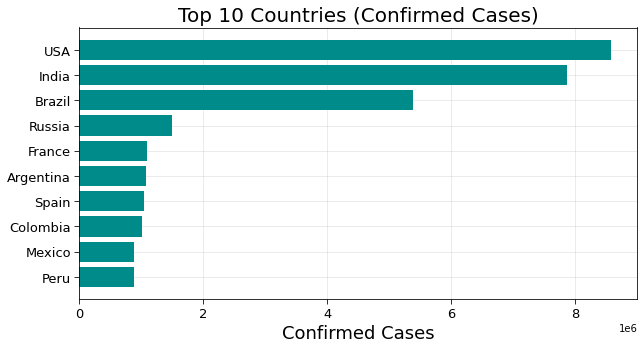

In [24]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)


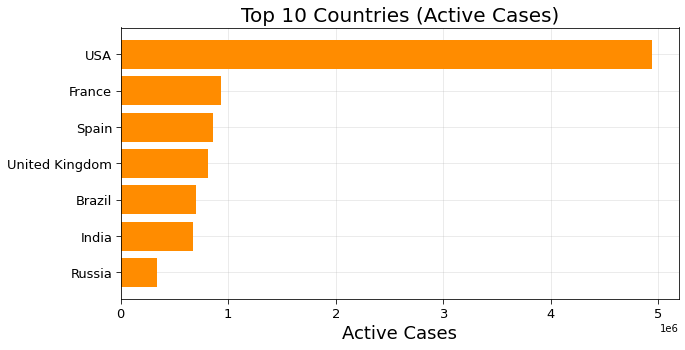

In [27]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

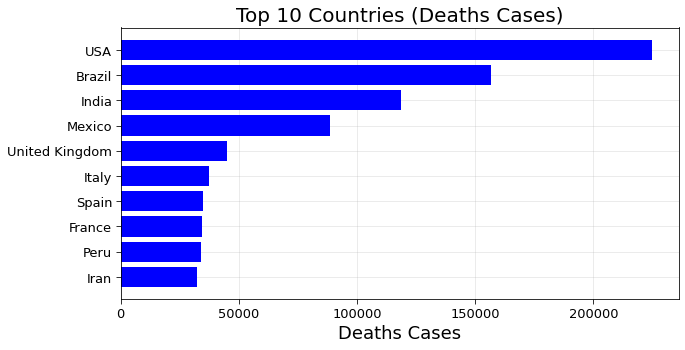

In [26]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="blue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

In [28]:
 df_countries_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
Confirmed,1.000000,0.935572,0.932533,0.780936,0.223565,nan,nan,0.024631,-0.014061
Deaths,0.935572,1.000000,0.818237,0.818096,0.247993,nan,nan,0.108963,-0.014497
Recovered,0.932533,0.818237,1.000000,0.502822,0.181129,nan,nan,0.027468,-0.021218
Active,0.780936,0.818096,0.502822,1.000000,0.220516,nan,nan,0.039153,0.029390
Incident_Rate,0.223565,0.247993,0.181129,0.220516,1.000000,nan,nan,-0.075276,-0.105024
People_Tested,nan,nan,nan,nan,nan,nan,nan,nan,nan
People_Hospitalized,nan,nan,nan,nan,nan,nan,nan,nan,nan
Mortality_Rate,0.024631,0.108963,0.027468,0.039153,-0.075276,nan,nan,1.000000,0.330422
UID,-0.014061,-0.014497,-0.021218,0.029390,-0.105024,nan,nan,0.330422,1.000000


In [34]:
## COVID-19 Spread Analysis
from datetime import datetime

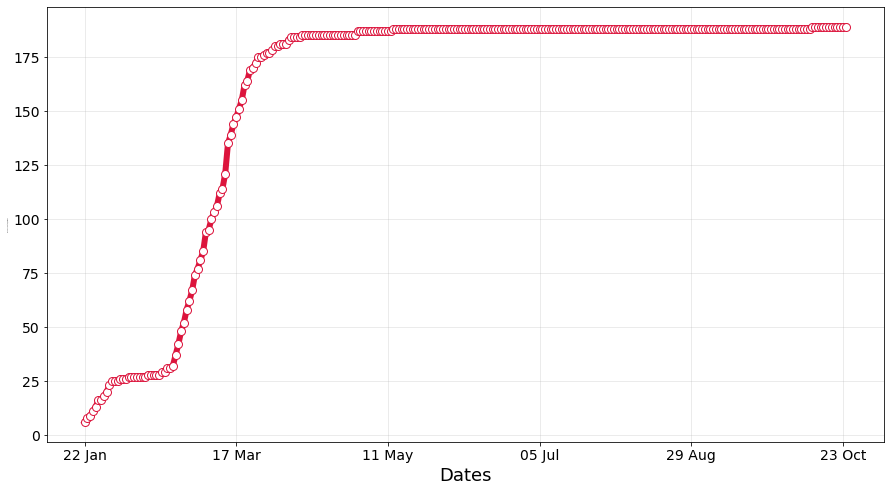

In [35]:
#spreding accross world

case_nums_country = confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=1)
plt.grid(alpha = 0.3)


plt.show()
plt.close()

In [40]:
import json, requests


In [41]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

C:\Users\trinkesh\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [42]:
total = df_india.sum()
total.name = "Total"
pd.DataFrame(total).transpose().style.background_gradient(cmap='Wistia',axis=1)

,confirmed,recovered,deaths,active
Total,7865107,7077406,118577,667792


In [43]:
df_india.style.background_gradient(cmap='Wistia')

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,1638961,1455107,43152,140194
Andhra Pradesh,804026,765991,6566,31469
Karnataka,798378,700737,10873,86749
Tamil Nadu,706136,663456,10893,31787
Uttar Pradesh,468238,433703,6854,27681
Delhi,352520,319828,6225,26467
Kerala,386088,287261,1307,97418
West Bengal,345574,302340,6427,36807
Odisha,279582,262031,1282,16269


In [44]:
df_india[df_india['deaths'] > 0].style.background_gradient(cmap='Wistia')

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,1638961,1455107,43152,140194
Andhra Pradesh,804026,765991,6566,31469
Karnataka,798378,700737,10873,86749
Tamil Nadu,706136,663456,10893,31787
Uttar Pradesh,468238,433703,6854,27681
Delhi,352520,319828,6225,26467
Kerala,386088,287261,1307,97418
West Bengal,345574,302340,6427,36807
Odisha,279582,262031,1282,16269


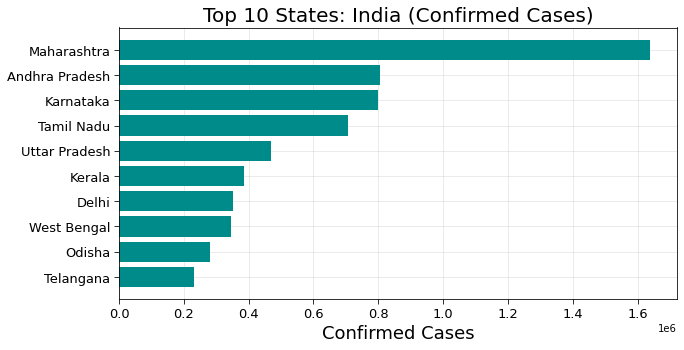

In [45]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

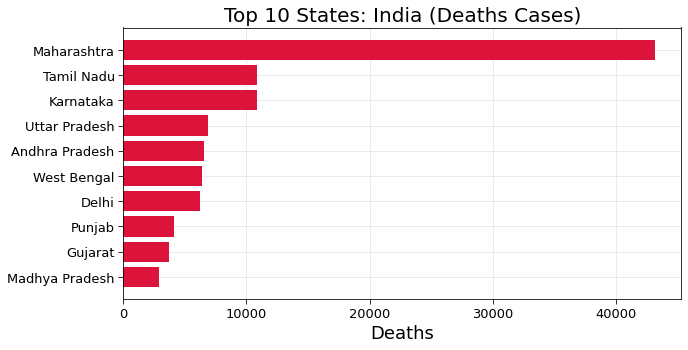

In [46]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)